In [62]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [63]:
os.environ['OMP_NUM_THREADS'] = '2'
print(os.environ['OMP_NUM_THREADS'])

2


In [18]:
df = pd.read_csv("cliente_atacadista.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [19]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


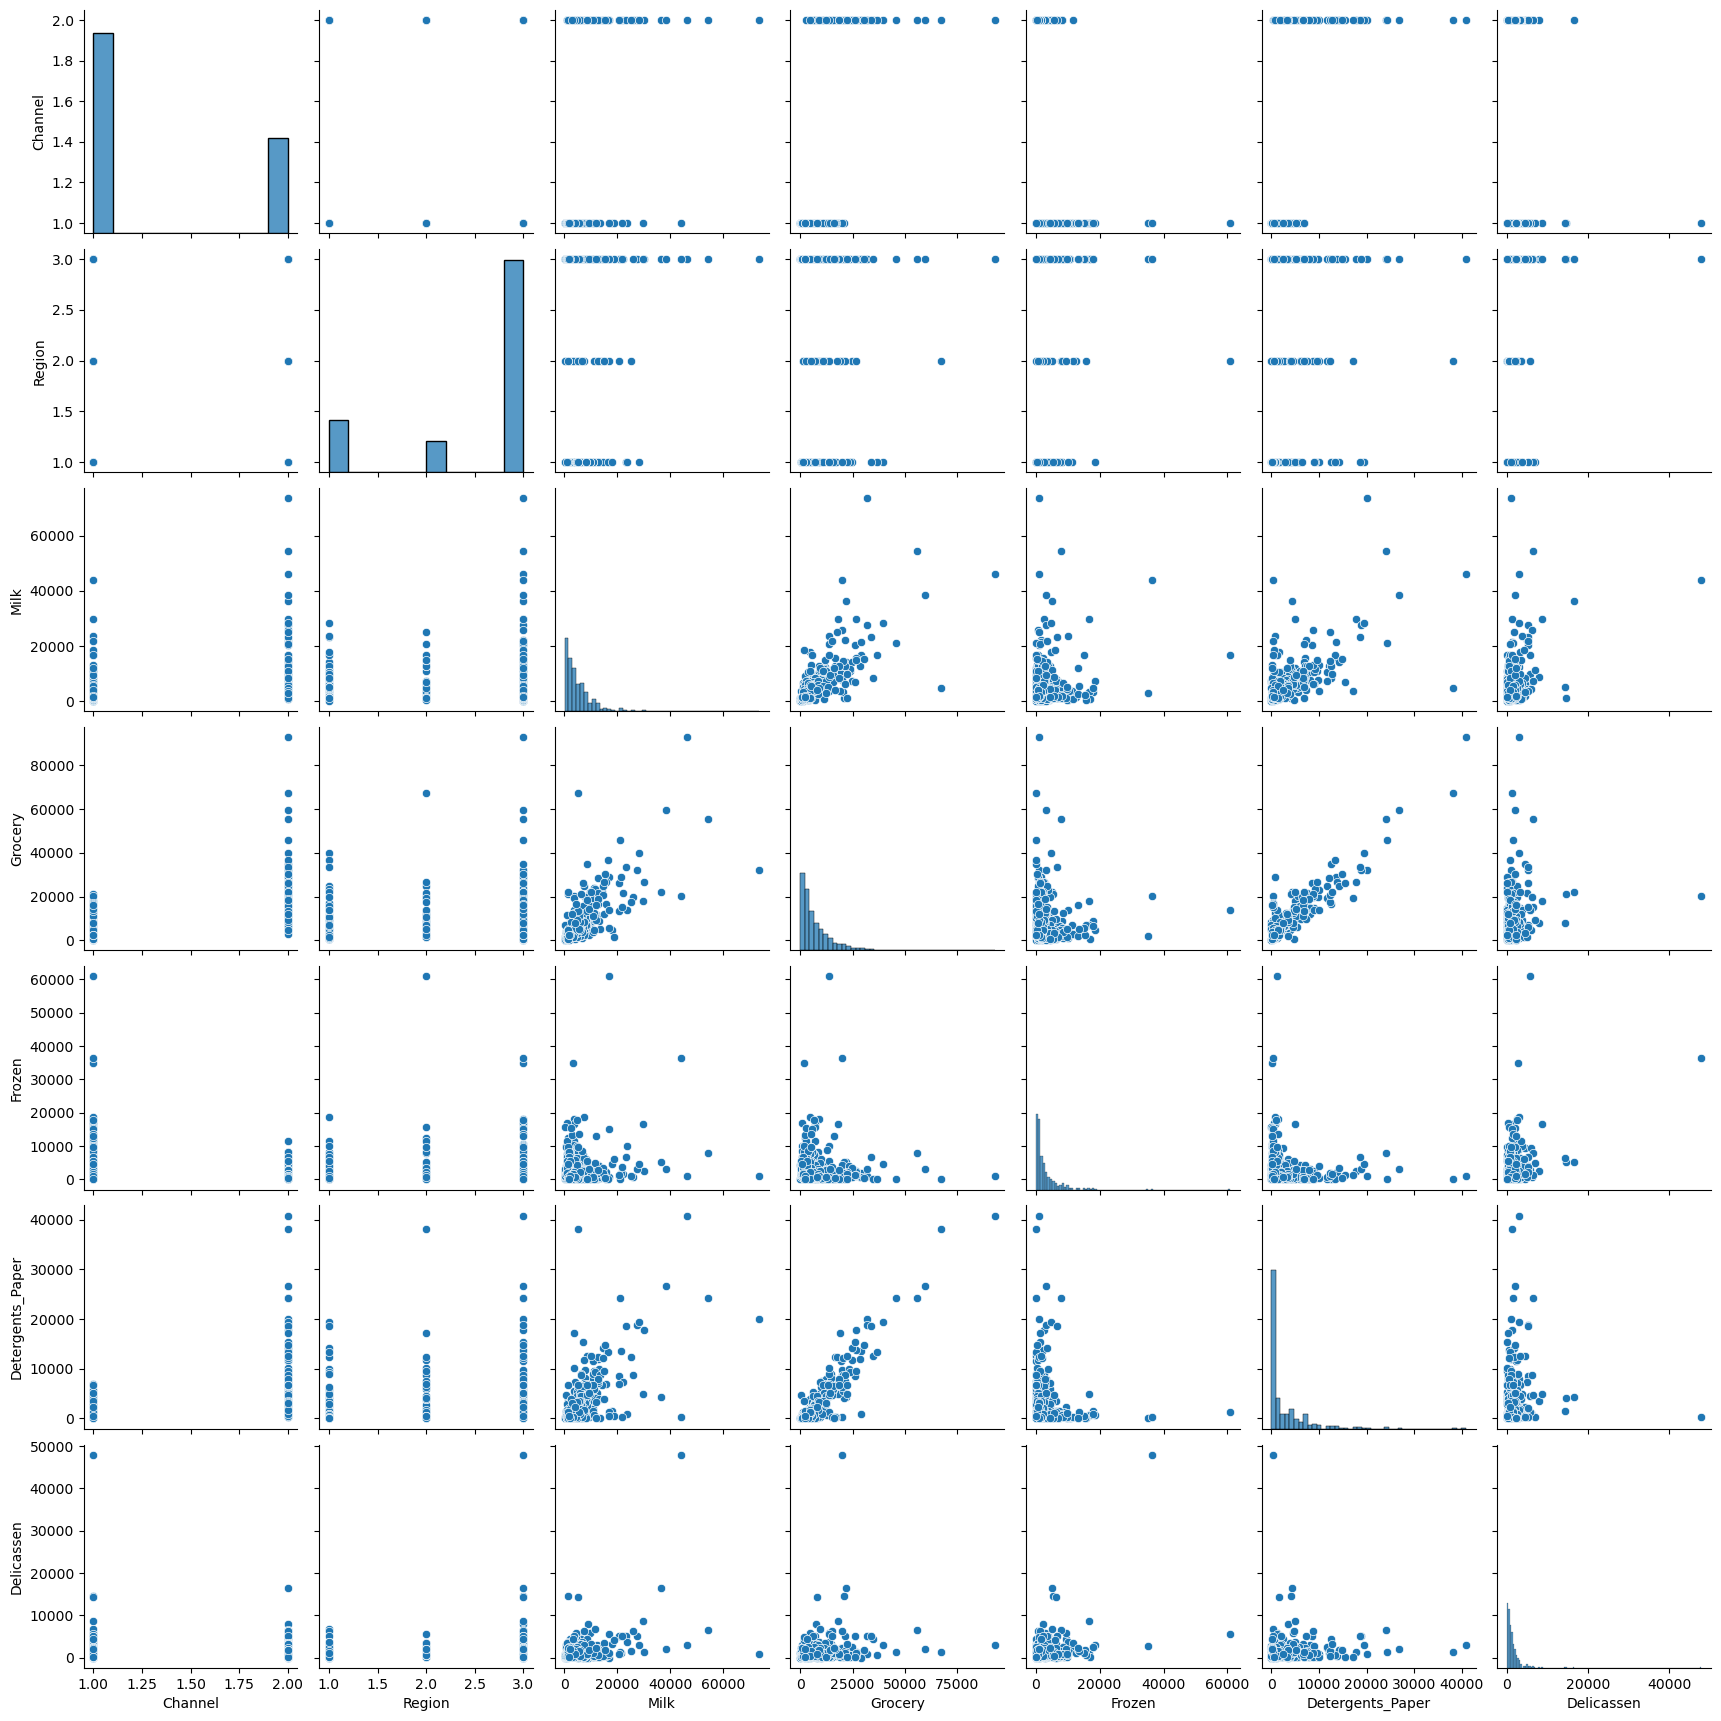

In [40]:
sns.pairplot(df[['Channel','Region','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']])

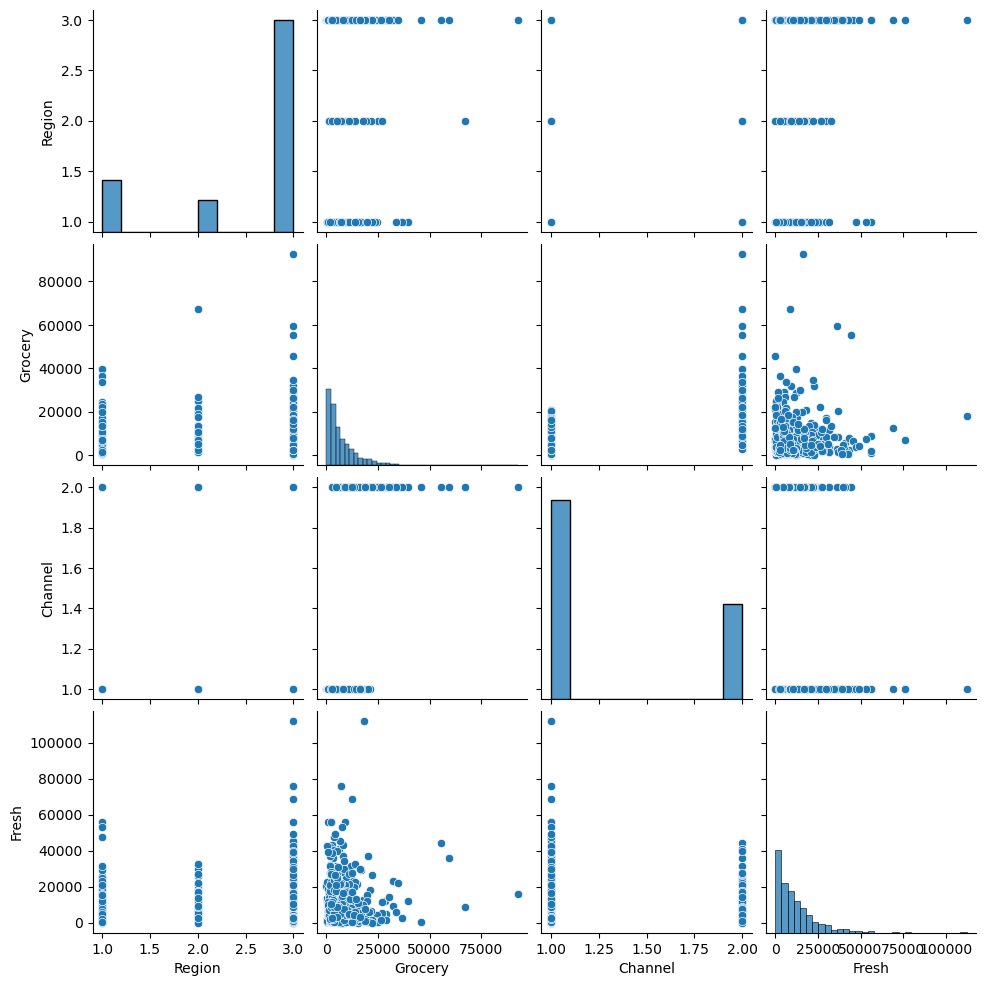

In [27]:
sns.pairplot(df[['Region','Grocery','Channel','Fresh']])

<BarContainer object of 440 artists>

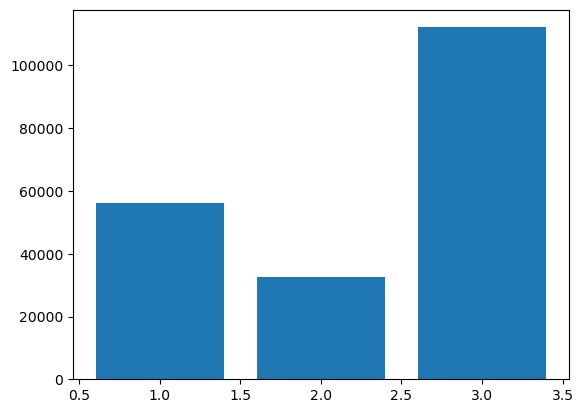

In [24]:
plt.bar(df['Region'],df['Fresh'])

In [9]:
df.Milk


0       9656
1       9810
2       8808
3       1196
4       5410
       ...  
435    12051
436     1431
437    15488
438     1981
439     1698
Name: Milk, Length: 440, dtype: int64

In [11]:
df.Region

0      3
1      3
2      3
3      3
4      3
      ..
435    3
436    3
437    3
438    3
439    3
Name: Region, Length: 440, dtype: int64

* conta a quanditade de vezes que cada regiao aparece

In [13]:
df.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

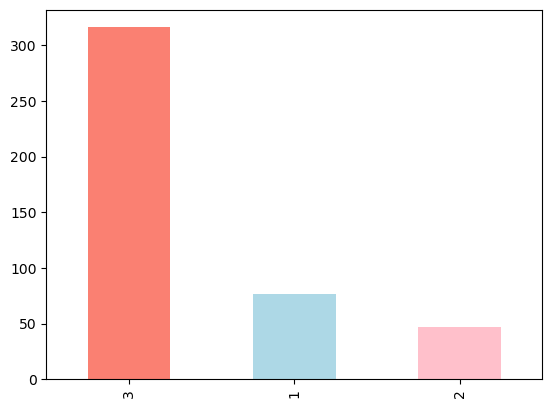

In [15]:
df.Region.value_counts().plot(kind="bar",color=["salmon", "lightblue","pink"]);

In [54]:
km = KMeans(n_clusters=3,init=k-means++ ,n_init=10,algorithm= auto)


In [45]:
km

KMeans(n_clusters=3, n_init=10)

In [55]:
y_predicted = km.fit_predict(df[['Channel','Region','Fresh','Grocery']])

C:\Users\anaro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [57]:
df['cluster']=y_predicted
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,0
437,2,3,14531,15488,30243,437,14841,1867,1
438,1,3,10290,1981,2232,1038,168,2125,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


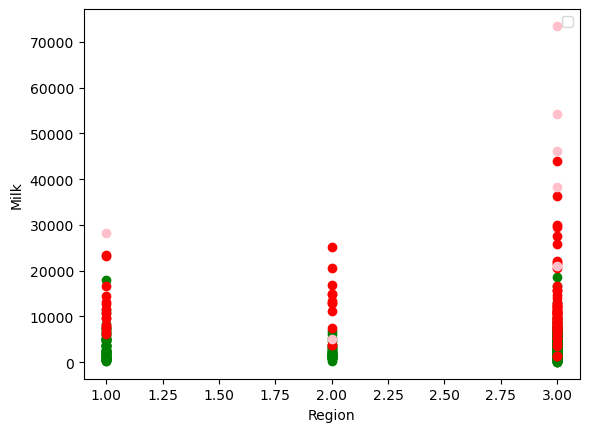

In [61]:
df0= df[df.cluster==0]
df1= df[df.cluster==1]
df2= df[df.cluster==2]

plt.scatter(df0.Region,df0['Milk'],color='green')
plt.scatter(df1.Region,df1['Milk'],color='red')
plt.scatter(df2.Region,df2['Milk'],color='pink')

plt.xlabel('Region')
plt.ylabel('Milk')
plt.legend()

In [68]:
scaler= MinMaxScaler()
scaler.fit(df[['Milk']])
df[['Milk']] = scaler.transform(df[['Milk']])
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,0.130727,7561,214,2674,1338,0
1,2,3,7057,0.132824,9568,1762,3293,1776,0
2,2,3,6353,0.119181,7684,2405,3516,7844,0
3,1,3,13265,0.015536,4221,6404,507,1788,0
4,2,3,22615,0.072914,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,0.163338,16027,13135,182,2204,1
436,1,3,39228,0.018736,764,4510,93,2346,0
437,2,3,14531,0.210136,30243,437,14841,1867,1
438,1,3,10290,0.026224,2232,1038,168,2125,0


In [ ]:
]


